
Jorge Caballeros Pérez 20009

Alejandra Guzmán 

#### 1. Utilice los conjuntos de entrenamiento y prueba de una de las series que utilizó en el Laboratorio 2


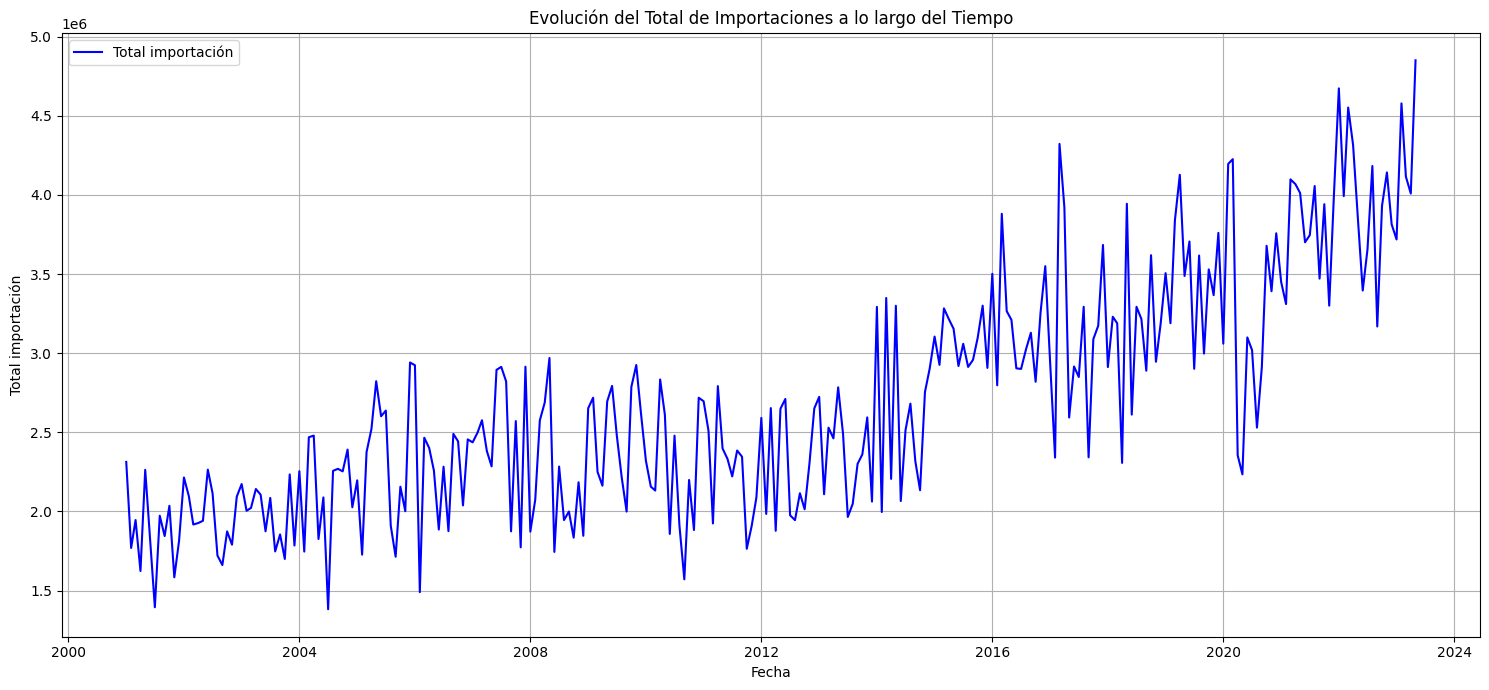

In [6]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

data = data.dropna(subset=['Fecha'])

data = data[data['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$')]

data['Fecha'] = pd.to_datetime(data['Fecha'])

plt.figure(figsize=(15, 7))
plt.plot(data['Fecha'], data['Total importación'], label='Total importación', color='blue')
plt.title('Evolución del Total de Importaciones a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total importación')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


### Preparación de la data

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("data.csv")
data_values = data['Total importación'].values.reshape(-1, 1)

# Normalize the data values to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_values)

# Split the data into 80% training and 20% test
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

def create_dataset(dataset, look_back=1):
    """Prepare data for LSTM"""
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Use the function to prepare data for LSTM
# Using a look_back of 3 (i.e., use past 3 months to predict the next month)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


### Modelo 1

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 1. First LSTM Model

# Define and train the model
model1 = Sequential()
model1.add(LSTM(50, input_shape=(look_back, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

# Making predictions
trainPredict1 = model1.predict(trainX)
testPredict1 = model1.predict(testX)


Epoch 1/50
212/212 [==============================] - 2s 2ms/step - loss: 0.0216
Epoch 2/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 3/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 4/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 5/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 6/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 7/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 8/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 9/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 10/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 11/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 12/50
212/212 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 13/50
212/212 [====

### Modelo 2

In [14]:
# 2. Second LSTM Model with different configuration

# Define and train the model
model2 = Sequential()
model2.add(LSTM(100, input_shape=(look_back, 1)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# Making predictions
trainPredict2 = model2.predict(trainX)
testPredict2 = model2.predict(testX)


Epoch 1/100
212/212 [==============================] - 2s 2ms/step - loss: 0.0210
Epoch 2/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 3/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 4/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 5/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 6/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 7/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 8/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 10/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 11/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 12/100
212/212 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/100


In [24]:
from sklearn.metrics import mean_squared_error

trainPredict1 = np.nan_to_num(trainPredict1)
testPredict1 = np.nan_to_num(testPredict1)
trainPredict2 = np.nan_to_num(trainPredict2)
testPredict2 = np.nan_to_num(testPredict2)
testY = np.nan_to_num(testY)


# Calculate MSE for both models
mse_model1 = mean_squared_error(testY, testPredict1)
mse_model2 = mean_squared_error(testY, testPredict2)

print(f"MSE for Model 1: {mse_model1}")
print(f"MSE for Model 2: {mse_model2}")

if mse_model1 < mse_model2:
    print("Model 1 predicted better.")
else:
    print("Model 2 predicted better.")


MSE for Model 1: 0.04712739364533485
MSE for Model 2: 0.041578459237601575
Model 2 predicted better.


El Modelo 2 tiene un Error Cuadrático Medio (MSE) menor que el Modelo 1, con valores de 0.0416 y 0.0471 respectivamente. El MSE es una métrica que mide la cantidad promedio de error en las predicciones del modelo en comparación con los valores reales; un MSE más bajo indica predicciones más precisas. Por lo tanto, el Modelo 2, con su MSE más bajo, ha demostrado ser más preciso en sus predicciones que el Modelo 1 en este conjunto de datos. Es posible que la configuración diferente del Modelo 2 (por ejemplo, más neuronas o más epochs de entrenamiento) haya contribuido a su mejor desempeño.